In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as misc
import IPython.display as disp

# Potenzreihen

<span style="font-size: 40pt">
$$
\vec{p} = \frac{m\vec{v}}{\sqrt{1-\frac{v^2}{c^2}}} \stackrel{v \ll c}{=} m\vec{v}
$$

_Jochen Illerhaus_

# Fragen?

## Konvergenzkriterien (vgl Tut06)
Betrachte $f(z) = \sum_{n=0}^\infty a_n (z-z_0)^n$
 * $$\big| z - z_0 \big| < R \Rightarrow \text{abs conv}$$
 * $$\frac 1R = \limsup_{n \to \infty} \sqrt[n]{|a_n|}$$
 * $$\frac 1R = \lim_{n \to \infty} \frac{a_{n+1}}{a_n}$$

## Wichtige Potentzreihen:

 * $$\frac{1}{1-z} = \sum_{n=0}^\infty z^n \; \; \forall \big|z\big| < 1$$
 * $$\sin(z) = \sum_{n=1}^\infty (-1)^n \frac{z^{2n+1}}{(2n+1)!} $$
 * $$\cos(z) = \sum_{n=1}^\infty (-1)^{n+1} \frac{z^{2n}}{(2n)!} $$
 * $$e^z = \sum_{n=0}^\infty \frac{z^n}{n!} $$
 * $$\ln(1-z) = \sum_{n=1}^\infty \frac{z^n}{n} $$


Später kommt noch der Satzt von Taylor:
$$ f(z) = \sum_{n=0}^\infty \frac{f^{(n)}(z_0)}{n!} (z-z_0)^n$$
[Externe Demo zum Satz von Taylor (unter Approximation, Taylor)](http://mathdemos.xyz/demos.html#)

# Blatt 7 Aufgabe 1

Finden Sie explizite Darstellungen der Funktionen $\mathbb{C} \to \mathbb{C}$, die durch die folgende Potenzreihen beschrieben sind:

 * **(c)** $$ \sum_{n=0}^\infty \frac{n-1}{(n+1)!} z^n $$
 * **(d)** $$ \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!} (z+1)^{2n+2} $$

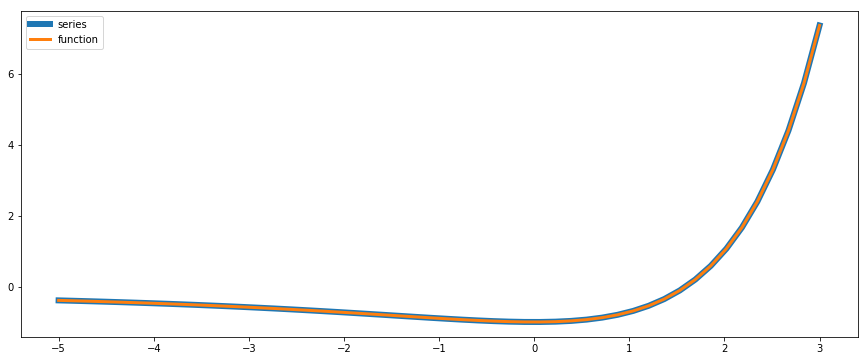

In [84]:
# 1c

Z = np.linspace(-5, 3)
N = np.arange(0, 20)
z, n = np.meshgrid(Z, N)
series = np.sum((n-1)*z**n/misc.factorial(n+1), axis=0)
plt.figure(figsize=(15, 6))
plt.plot(Z, series, label="series", linewidth=6)
plt.plot(Z, ((Z-2)*np.exp(Z)+2)/Z, label="function", linewidth=3)
plt.legend();

disp.display(disp.HTML("<h2>$\\sum_{n=0}^{20} \\frac{n-1}{(n+1)!} z^n \\approx \\frac{(z-2)e^z+2}{z}$</h2>"))

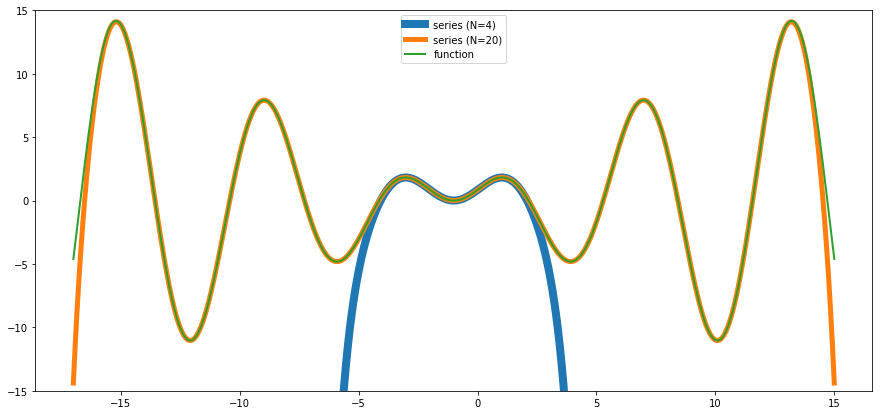

In [94]:
Z = np.linspace(-17, 15, 400)
plt.figure(figsize=(15, 7))
def plot(NN, **kwargs):
    N = np.arange(0, NN)
    z, n = np.meshgrid(Z, N)
    series = np.sum((-1)**n*(z+1)**(2*n+2)/(misc.factorial(2*n+1)), axis=0)
    plt.plot(Z, series, **kwargs)
plot(4, label="series (N=4)", linewidth=8)
plot(20, label="series (N=20)", linewidth=5)
plt.plot(Z, (Z+1)*np.sin(Z+1), label="function", linewidth=2)
plt.legend()
plt.ylim(-15, 15)
disp.display(disp.HTML("<h2>$\\sum_{n=1}^{N} \\frac{(-1)^n}{(2n+1)!}(z+1)^{2n+2} \\approx (z+1) \\sin(z+1)$</h2>"))

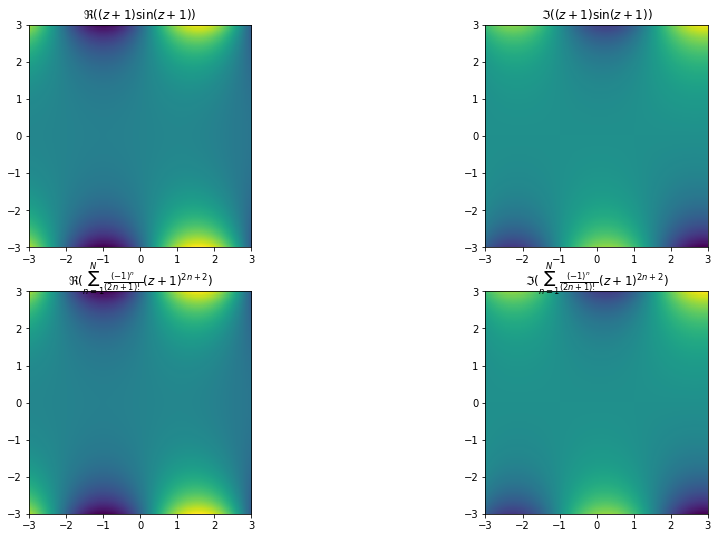

In [108]:
extent = [-3, 3, -3, 3]

X = np.linspace(*extent[:2], 200)
Y = np.linspace(*extent[2:], 200)
x, y = np.meshgrid(X, Y)
z = x + 1j*y

f = (z+1)*np.sin(z+1)

N = np.arange(0, 20)
zz, nn = np.meshgrid(z.reshape(200*200), N)
s = np.sum((-1)**nn*(zz+1)**(2*nn+2)/(misc.factorial(2*nn+1)), axis=0)
s = s.reshape(200, 200)

fig, ((axar, axai), (axbr, axbi)) = plt.subplots(2, 2, figsize=(15, 9))

axar.set_title("$\\Re ((z+1) \\sin(z+1))$")
imgfr = axar.imshow(np.real(f), extent=extent)
axai.set_title("$\\Im ((z+1) \\sin(z+1))$")
imgfi = axai.imshow(np.imag(f), extent=extent)

axbr.set_title("$\\Re (\\sum_{n=1}^{N} \\frac{(-1)^n}{(2n+1)!}(z+1)^{2n+2})$")
imgsr = axbr.imshow(np.real(s), extent=extent)
axbi.set_title("$\\Im (\\sum_{n=1}^{N} \\frac{(-1)^n}{(2n+1)!}(z+1)^{2n+2})$")
imgsi = axbi.imshow(np.imag(s), extent=extent)

# Blatt 7 Aufgabe 2

Für welche $x \in \mathbb{R}$ bzw. $z \in \mathbb{C}$ konvergieren die folgenden Potenzreihen?

**(d)** $$ \sum_{k=0}^\infty 2^k z^{k^2} $$
**(e)** $$ \sum_{k=1}^\infty \Big( 1 + \frac 12 + \cdots + \frac 1n \Big) z^n $$

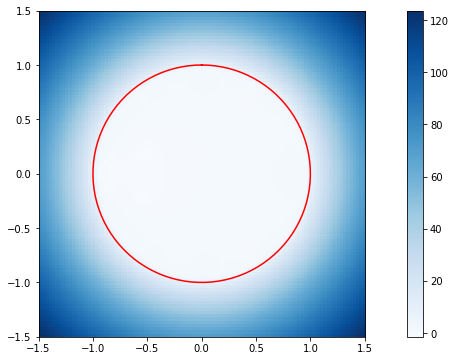

In [54]:
X = np.linspace(-1.5, 1.5, 100)
Y = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(X, Y)
z = x+1j*y
n = np.arange(0, 20)
zz, nn = np.meshgrid(z.reshape(10000), n)
f = np.sum(2**nn*zz**(nn**2), axis=0)
f = f.reshape(100, 100)
img = np.abs(f)

plt.figure(figsize=(15, 6))

plt.imshow(np.log10(img), cmap=plt.cm.Blues, extent=[-1.5, 1.5, -1.5, 1.5])
plt.colorbar()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t), color="red")

disp.display(disp.HTML("<h2>$\\log_{10} \\bigg| \\sum_{k=0}^{20} 2^k z^{k^2} \\bigg|$</h2>"))

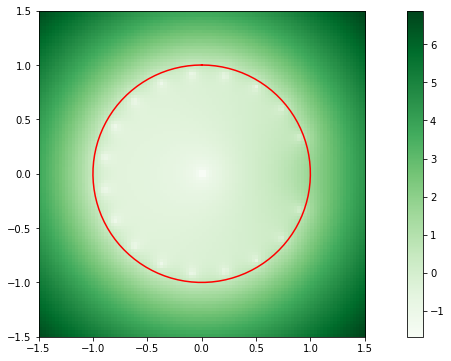

In [71]:
X = np.linspace(-1.5, 1.5, 100)
Y = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(X, Y)
z = x+1j*y
n = np.arange(1, 20)
an = np.cumsum(1/n)
zz, ann = np.meshgrid(z.reshape(10000), an)
zz, nn = np.meshgrid(z.reshape(10000), n)
f = np.sum(ann*zz**nn, axis=0)
f = f.reshape(100, 100)
img = np.abs(f)

plt.figure(figsize=(15, 6))

plt.imshow(np.log10(img), cmap=plt.cm.Greens, extent=[-1.5, 1.5, -1.5, 1.5])
plt.colorbar()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t), color="red")

disp.display(disp.HTML("<h2>$\\log_{10} \\bigg| \\sum_{n=1}^{20} \\sum_{k=1}^n \\frac{1}{k} z^n  \\bigg|$</h2>"))

## Blatt 7 Aufgabe 3

 * **(c)** $$ \sin(x) + \sin(y) = 2 \sin\bigg(\frac{x+y}{2}\bigg) \cos\bigg(\frac{x-y}{2}\bigg) $$
 * **(d)** $$ \cos(x) +\cos(y) = 2 \cos\bigg(\frac{x+y}{2}\bigg) \cos\bigg(\frac{x-y}{2}\bigg) $$
 
$$
\sin(\alpha + \beta) = \sin(\alpha) \cos(\beta) + \cos(\alpha) \sin(\beta) \tag{a}
$$

$$
\cos(\alpha + \beta) = \cos(\alpha) \cos(\beta) - \sin(\alpha) \sin(\beta) \tag{b}
$$

# Additionstheoreme

<div style="font-size: 18pt">
$$
\sin(\alpha \pm \beta) = \sin(\alpha) \cos(\beta) \pm \cos(\alpha) \sin(\beta) \tag{a}
$$

$$
\cos(\alpha \pm \beta) = \cos(\alpha) \cos(\beta) \mp \sin(\alpha) \sin(\beta) \tag{b}
$$

$$
\sin(2 \alpha) = 2 \sin(\alpha) \cos(\alpha) \tag{c}
$$

$$
\cos(2 \alpha) = \cos^2(\alpha) - \sin^2(\alpha) \tag{d}
$$

$$
\sin^2(\alpha) + \cos^2(\alpha) = 1 \tag{e}
$$
</div>

# ETIT 2015 H HM1 2b (5 Punkte) (optional)

Gegeben sei die reelle Potenzreihe
$$
\sum_{n=0}^\infty \Big( \frac{5+(-1)^n}{3} \Big)^n (x-1)^n
$$

**i)** Berechnen Sie den Konvergenzradius $R$ der Potenzreihe.

**ii)** Ermitteln Sie die Menge aller Punkte $x \in \mathbb{R}$,in denen die Reihe konvergiert.